# The Rankine Cycle Analysis with Simple Abstraction
 
Michael J. Moran, Howard N. Shapiro, Daisie D. Boettner, Margaret B. Bailey. Fundamentals of Engineering Thermodynamics(7th Edition). John Wiley & Sons, Inc. 2011
 
**Chapter 8 : Vapor Power Systems:**

**1** EXAMPLE 8.1 Analyzing an Ideal Rankine Cycle P438

**2** EXAMPLE 8.2 Analyzing a Rankine Cycle with `Irreversibilities` P444

1. Expression only

2. The simple abstraction(List dict,function)

3. The simple abstraction and data files

4. T-s Diagram

**Further Reading**

* [PyRankine: The Simulator : General Abstraction and CSV Textual Model of Rankine Cycle](https://github.com/PySEE/PyRankine/tree/master/sim-fun)


## 1  Example 8.1: Analyzing an Ideal Rankine Cycle 

Steam is the working fluid in an ideal Rankine cycle. 

Saturated vapor enters the turbine at 8.0 MPa and saturated liquid exits the condenser at a pressure of 0.008 MPa. 

The net power output of the cycle is 100 MW.

![rankine81](./img/rankine81.jpg)

* **Process 1–2:** **Isentropic expansion** of the working fluid through the turbine from saturated vapor at state 1 to the condenser pressure.
* **Process 2–3:** Heat transfer from the working fluid as it flows at **constant pressure**
through the condenser with saturated liquid at state 3.
* **Process 3–4:** **Isentropic compression** in the pump to state 4 in the compressed liquid region.
* **Process 4–1:** Heat transfer to the working fluid as it flows at **constant pressure** through the boiler to complete the cycle.

Determine for the cycle

(a) the thermal efficiency,

(b) the back work ratio, 

(c) the mass flow rate of the steam,in kg/h,

(d) the rate of heat transfer, Qin, into the working fluid as it passes through the boiler, in MW,

(e) the rate of heat transfer, Qout, from the condensing steam as it passes through the condenser, in MW,

(f) the mass flow rate of the condenser cooling water, in kg/h, if cooling water enters the condenser at 15°C and exits at 35°C.

**Engineering Model:**

* 1 Each **component** of the cycle is analyzed as a **control volume** at steady state. The control volumes are shown on the accompanying sketch by **dashed** lines.


* 2 All processes of the working fluid are internally reversible.


* 3 The turbine and pump operate adiabatically.


* 4 Kinetic and potential energy effects are negligible.


* 5 Saturated vapor enters the turbine. Condensate exits the condenser as saturated liquid.

### 1.1 Analysis States

To begin the analysis, we fix each of **the principal states（1，2，3，4)** located on the accompanying schematic and **T–s** diagrams.

In [1]:
from seuif97 import *

# State  1
p1 = 8.0  # in MPa
t1 = px2t(p1, 1)
h1 = px2h(p1, 1)          # h1 = 2758.0    From table A-3  kj/kg
s1 = px2s(p1, 1)          # s1 = 5.7432    From table A-3  kj/kg.k

# State  2 ,p2=0.008
p2 = 0.008
s2 = s1
t2 = ps2t(p2, s2)
h2 = ps2h(p2, s2)

# State 3 is saturated liquid at 0.008 MPa
p3 = 0.008
t3 = px2t(p3, 0)
h3 = px2h(p3, 0)  # kj/kg
s3 = px2s(p3, 0)

# State 4
p4 = p1
s4 = s3
h4 = ps2h(p4, s4)
t4 = ps2h(p4, s4)

### 1.2 Analysis Performance

#### (a) The thermal efficiency

The net power developed by the cycle is

$\dot{W}_{cycle}=\dot{W}_t-\dot{W}_p$

Mass and energy rate balances for control volumes around the turbine and pump give,respectively

$\frac{\dot{W}_t}{\dot{m}}=h_1-h_2$  
$\frac{\dot{W}_p}{\dot{m}}=h_4-h_3$

where $\dot{m}$ is the mass flow rate of the steam. The rate of heat transfer to the working fluid as it passes through the boiler is determined using mass and energy rate balances as

$\frac{\dot{Q}_{in}}{\dot{m}}=h_1-h_4$

The thermal efficiency is then


$\eta=\frac{\dot{W}_t-\dot{W}_p}{\dot{Q}_{in}}=\frac{(h_1-h_2)-(h_4-h_3)}{h_1-h_4}$


In [2]:
# Part(a)
# Mass and energy rate balances for control volumes
# around the turbine and pump give, respectively

# turbine
wtdot = h1 - h2
# pump
wpdot = h4-h3

# The rate of heat transfer to the working fluid as it passes
# through the boiler is determined using mass and energy rate balances as
qindot = h1-h4

# thermal efficiency
eta = (wtdot-wpdot)/qindot

# Result for part a
print('(a) The thermal efficiency for the cycle is {:>.2f}%'.format(eta*100))

(a) The thermal efficiency for the cycle is 37.08%


#### (b) The back work ratio is

$bwr=\frac{\dot{W}_p}{\dot{W}_t}=\frac{h_4-h_3}{h_1-h_2}$

#### (c) The mass flow rate of the steam can be obtained from the expression for the net power given in part (a). Thus

$\dot{m}=\frac{\dot{W}_{cycle}}{(h_1-h_2)-(h_4-h_3)}$

#### (d) With the expression for $\dot{Q}_{in}$ in from part (a) and previously determined specific enthalpy values

$\dot{Q}_{in}=\dot{m}(h_1-h_4)$

#### (e) Mass and energy rate balances applied to a control volume enclosing the steam side of the condenser give

$\dot{Q}_{out}=\dot{m}(h_2-h_3)$

#### (f) Taking a control volume around the condenser, the mass and energy rate balances give at steady state


$\require{cancel} 0=\dot{\cancel{Q}}^{0}_{cv}-\dot{\cancel{w}}^{0}_{cv}+\dot{m}_{cw}(h_{cw,in}-h_{cw,out})+\dot{m}(h_2-h_3)$

where $\dot{m}_{cw}$ is the mass flow rate of the cooling water. Solving for $\dot{m}_{cw}$

 $\dot{m}_{cw}=\frac{\dot{m}(h_2-h_3)}{h_{cw,in}-h_{cw,out}}$

In [3]:
# Part(b)
# back work ratio：bwr, defined as the ratio of the pump work input to the work
# developed by the turbine.
bwr = wpdot/wtdot                                    #

# Result
print('(b) The back work ratio is %.3f%%' % (bwr*100))

# Part(c)
Wcycledot = 100.00     # the net power output of the cycle in MW
mdot = (Wcycledot*10**3*3600)/((h1-h2)-(h4-h3))       # mass flow rate in kg/h

# Result
print('(c) The mass flow rate of the steam is {:>.2f}kg/h.'.format(mdot))

# Part(d)
Qindot = mdot*qindot/(3600*10**3)                     # in MW

# Results
print('(d) The rate of heat transfer Qindot into the working fluid as '+
       'it passes through the boiler is {:>.2f}MW.'.format(Qindot))

# Part(e)
Qoutdot = mdot*(h2-h3)/(3600*10**3)                   # in MW

# Results
print('(e) The rate of heat transfer Qoutdot from the condensing steam '+
       'as it passes through the condenser is {:>.2f} MW.'.format(Qoutdot))

# Part(f)

# Given:
tcwin = 15
tcwout = 35

hcwout = tx2h(tcwout, 0)   # From table A-2,hcwout= 146.68  kj/kg

hcwin = tx2h(tcwin, 0)    # hcwin 62.99
mcwdot = (Qoutdot*10**3*3600)/(hcwout-hcwin)          # in kg/h

# Results
print('(f) The mass flow rate of the condenser cooling water is {:>.2f}kg/h.'.format(mcwdot))

(b) The back work ratio is 0.835%
(c) The mass flow rate of the steam is 376770.81kg/h.
(d) The rate of heat transfer Qindot into the working fluid as it passes through the boiler is 269.68MW.
(e) The rate of heat transfer Qoutdot from the condensing steam as it passes through the condenser is 169.68 MW.
(f) The mass flow rate of the condenser cooling water is 7301242.75kg/h.


## 2 Example8.2 :Analyzing a Rankine Cycle with Irreversibilities

Reconsider the vapor power cycle of Example 8.1, but include in the analysis that the turbine and the pump each have an isentropic efficiency of 85%. 

Determine for the modified cycle 

* (a) the thermal efficiency, 

* (b) the mass flow rate of steam, in kg/h, for a net power output of 100MW, 

* (c) the rate of heat transfer $\dot{Q}_{in}$ in into the working fluid as it passes through the boiler, in MW, 

* (d) the rate of heat transfer $\dot{Q}_{out}$ out from the condensing steam as it passes through the condenser, in MW, 

* (e) the mass flow rate of the condenser cooling water, in kg/h, if cooling water enters the condenser at 15°C and exits as 35°C.

**SOLUTION**

**Known:** A vapor power cycle operates with steam as the working fluid. The turbine and pump both have efficiencies of 85%.

**Find:** Determine the thermal efficiency, the mass flow rate, in kg/h, the rate of heat transfer to the working fluid as it passes through the boiler, in MW, the heat transfer rate from the condensing steam as it passes through thecondenser, in MW, and the mass flow rate of the condenser cooling water, in kg/h.

**Engineering Model:**

1. Each component of the cycle is analyzed as a control volume at steady state.

2. The working fluid passes through the boiler and condenser at constant pressure. Saturated vapor enters the turbine. The condensate is saturated at the condenser exit.

3. The turbine and pump each operate adiabatically with an efficiency of 85%.

4. Kinetic and potential energy effects are negligible

![rankine82](./img/rankine82.jpg)

**Analysis:**

Owing to the presence of `irreversibilities` during the expansion of the steam through the turbine, there is an increase in specific entropy from turbine inlet to exit, as shown on the accompanying T–s diagram. Similarly,there is an increase in specific entropy from pump inlet to exit.

Let us begin the analysis by fixing each of the principal states.

### 2.1 Analysis states

In [4]:
from seuif97 import *

# State  1
p1 = 8.0               #  in MPa
t1 =px2t(p1,1) 
h1=px2h(p1,1)          # h1 = 2758.0    From table A-3  kj/kg
s1=px2s(p1,1)          # s1 = 5.7432    From table A-3  kj/kg.k

# State  2 ,p2=0.008
p2=0.008
s2s = s1
h2s=ps2h(p2,s2s)
t2s=ps2t(p2,s2s)
etat_t=0.85
h2=h1-etat_t*(h1-h2s)
t2 =ph2t(p2,h2)     
s2 =ph2s(p2,h2)     

# State 3 is saturated liquid at 0.008 MPa
p3 = 0.008            
t3=px2t(p3,0) 
h3 =px2h(p3,0)                                     #  kj/kg
s3 =px2s(p3,0)     

#State 4 
p4 = p1
s4s=s3
h4s =ps2h(p4,s4s)
t4s =ps2t(p4,s4s) 
etat_p=0.85
h4=h3+(h4s-h3)/etat_p
t4 =ph2t(p4,h4)     
s4 =ph2s(p4,h4)

### 2.2 Analysis Performance

In [5]:
# Part(a)
eta = ((h1-h2)-(h4-h3))/(h1-h4)             # thermal efficiency

# Result for part (a)
print('Thermal efficiency is: {:>.2f}%'.format(100*eta))

# Part(b)
Wcycledot = 100                             # given,a net power output of 100 MW
# Calculations
mdot = (Wcycledot*(10**3)*3600)/((h1-h2)-(h4-h3))
# Result for part (b)
print(
    'The mass flow rate of steam for a net power output of 100 MW is  {:>.2f}kg/h'.format(mdot))

# Part(c)
Qindot = mdot*(h1-h4)/(3600 * 10**3)
# Result
print(
    'The rate of heat transfer Qindot into the working fluid as it passes through the boiler is {:>.2f}MW.'.format(Qindot))

# Part(d)
Qoutdot = mdot*(h2-h3)/(3600*10**3)
# Result
print('The rate of heat transfer Qoutdot from the condensing steam as it passes through the condenser is {:>.2f}MW'.format(
    Qoutdot))

# Part(e)
tcwin = 15
tcwout = 35
hcwout = tx2h(tcwout, 0)   # From table A-2,hcwout= 146.68  kj/kg
hcwin = tx2h(tcwin, 0)    # hcwin 62.99
mcwdot = (Qoutdot*10**3*3600)/(hcwout-hcwin)
# Result
print(
    'The mass flow rate of the condenser cooling water, is {:>.2f}kg/h'.format(mcwdot))

Thermal efficiency is: 31.43%
The mass flow rate of steam for a net power output of 100 MW is  444698.07kg/h
The rate of heat transfer Qindot into the working fluid as it passes through the boiler is 318.12MW.
The rate of heat transfer Qoutdot from the condensing steam as it passes through the condenser is 218.12MW
The mass flow rate of the condenser cooling water, is 9385814.18kg/h


### 2.3 T-S Diagram

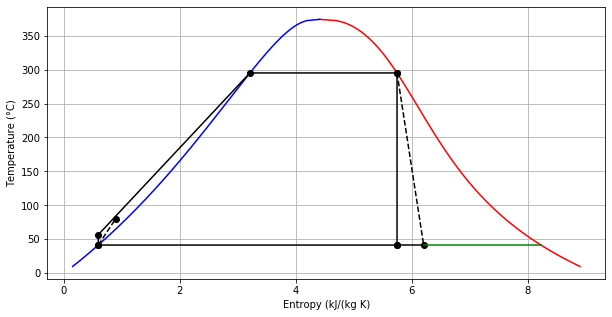

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10.0,5.0))

# saturated vapor and liquid entropy lines 
npt = np.linspace(10,647.096-273.15,200) # range of temperatures
svap = [s for s in [tx2s(t, 1) for t in npt]]
sliq = [s for s in [tx2s(t, 0) for t in npt]]
plt.plot(svap, npt, 'r-')
plt.plot(sliq, npt, 'b-')

t=[t1,t2s,t3,t4s+15]
s=[s1,s2s,s3,s4s]

# point 5
t.append(px2t(p1,0))
s.append(px2s(p1,0))

t.append(t1)
s.append(s1)

plt.plot(s, t, 'ko-')

tb=[t1,t2]
sb=[s1,s2]
plt.plot(sb, tb, 'k--')
tist=[t2,t2s]
sist=[s2,s2s]
plt.plot(sist, tist, 'ko-')

sp=[s3,s3+0.3]
tp=[t3,ps2t(p4,s3+0.3)+15]
plt.plot(sp, tp, 'ko--')

tist=[t2,t2s]
sist=[s2,px2s(p2,1)]
plt.plot(sist, tist, 'g-')

plt.xlabel('Entropy (kJ/(kg K)')
plt.ylabel('Temperature (°C)')
plt.grid()
plt.show()

### 2.4 Discussion of Examples 8.1 and 8.2

The effect of irreversibilities within the turbine and pump can be gauged by comparing values from Example 8.2 with their counterparts in Example 8.1. In Example 8.2,
the turbine work per unit of mass is less and the pump work per unit of mass is greater than in Example 8.1, as can be confirmed using data from these examples.
The thermal efficiency in Example 8.2 is less than in the ideal case of Example 8.1 

For a fixed net power output (100 MW), the smaller net work output per unit mass in Example 8.2 dictates a greater mass flow rate of steam than in Example 8.1. The magnitude of the heat transfer to cooling water is also greater in Example 8.2 than in Example 8.1; consequently, a greater mass flow rate of cooling water is required.

***

## 3 The Simple Abstraction of the Rankine Cycle 

* **List, Dict**：combination of objects(data) 

* **Function:**   abstraction of procedures

The Rankine Cycle 8.1,8.2 :
```
   
    ----Node 0---Turbine---Node 1----
    |                               |
  Boiler                          Condenser
    |                               |
    ----Node 3---Pump------Node 2---- 
```
**Nodes(States), Devices, Rankine Cycle**

### 3.1 Nodes

**List, Dict**：combination of objects(data) 

**Function:**  abstraction of procedures

```python
Nodes = [{'p': 8.0,  't': None, 'x': 1.0,   'h': None, 's': None},
         {'p': 0.008, 't': None, 'x': None, 'h': None, 's': None},
         {'p': 0.008, 't': None, 'x': 0.0,  'h': None, 's': None},
         {'p': 8.0,  't': None, 'x': 0.0,  'h': None, 's': None}
        ]
```

In [7]:
from seuif97 import *

# Analysis: fix each of the principal states   

def FixeNodesState(Nodes):
    for node in Nodes:     
        if node['p'] != None and node['t'] != None:
            node['h'] = pt2h(node['p'], node['t'])
            node['s'] = pt2s(node['p'], node['t'])
            node['x'] = pt2x(node['p'], node['t'])
        elif node['p'] != None and node['x'] != None:
            node['t'] = px2t(node['p'], node['x'])
            node['h'] = px2h(node['p'], node['x'])
            node['s'] = px2s(node['p'], node['x'])
        elif node['t'] != None and  node['x'] != None:
            node['p'] = tx2p(node['t'], node['x'])
            node['h'] = tx2h(node['t'], node['x'])
            node['s'] = tx2s(node['t'], node['x'])
    
    return Nodes

**Using `pprint` to print**

Data pretty printer https://docs.python.org/3/library/pprint.html

In [8]:
import pprint

Nodes = [{'p': 8.0,  't': None, 'x': 1.0,   'h': None, 's': None},
         {'p': 0.008, 't': None, 'x': None, 'h': None, 's': None},
         {'p': 0.008, 't': None, 'x': 0.0,  'h': None, 's': None},
         {'p': 8.0,  't': None, 'x': 0.0,  'h': None, 's': None}
        ]
FixeNodesState(Nodes)

pp = pprint.PrettyPrinter(indent=4)
pp.pprint(Nodes)


[   {   'h': 2758.611080680434,
        'p': 8.0,
        's': 5.744848808940075,
        't': 295.00912125631703,
        'x': 1.0},
    {'h': None, 'p': 0.008, 's': None, 't': None, 'x': None},
    {   'h': 173.8517685972624,
        'p': 0.008,
        's': 0.592531583591964,
        't': 41.51005270424139,
        'x': 0.0},
    {   'h': 1317.0797887855729,
        'p': 8.0,
        's': 3.207651008044679,
        't': 295.00912125631703,
        'x': 0.0}]


### 3.2 Devices

**Dict**：combination of `objects`(data) 

**Function:**  abstraction of `procedures`

The rankine cycle 8.1,8.2 :

```
   
    ----Node 0---Turbine---Node 1----
    |                               |
  Boiler                          Condenser
    |                               |
    ----Node 3---Pump------Node 2---- 
```

The Rankine Cycle 8.1 with Irreversibilities

* Turbine and  Pump`{'eta':None}`

```python
Boiler = {'minID':None, 'moutID': None, 'qindot': None}
Turbine = {'minID':None, 'moutID': None,'eta':None, 'wdot': None}
Pump = {'minID': None, 'moutID': None, 'eta':None,'wdot': None}
Condenser = {'minID':None, 'moutID': None, 'qoutdot': None}
```


In [9]:
from seuif97 import *

def CalBoiler(Boiler, Nodes):
    """Boiler {'minID':None, 'moutID': None, 'qindot': None}"""
    iID = Boiler['minID']
    oID = Boiler['moutID']
    # 2 Mass and Energy Balance
    Boiler['qindot'] = Nodes[oID]['h']-Nodes[iID]['h']
    
def CalTurbine(Turbine, Nodes):
    """Turbine {'minID':None, 'moutID': None,'eta':None, 'wdot': None}"""
    iID = Turbine['minID']
    oID = Turbine['moutID']
    # 1 States
    sout_s = Nodes[iID]['s']
    hout_s = ps2h(Nodes[oID]['p'], sout_s)
    Nodes[oID]['h'] = Nodes[iID]['h'] - Turbine['eta']*(Nodes[iID]['h']-hout_s)
    Nodes[oID]['t'] = ph2t(Nodes[oID]['p'], Nodes[oID]['h'])
    Nodes[oID]['s'] = ph2s(Nodes[oID]['p'], Nodes[oID]['h'])
    Nodes[oID]['x'] = ph2x(Nodes[oID]['p'], Nodes[oID]['h'])
    # 2 Mass and Energy Balance
    Turbine['wdot'] = Nodes[iID]['h'] - Nodes[oID]['h']

def CalCondenser(Condenser, Nodes):
    """Condenser {'minID':None, 'moutID': None, 'qoutdot': None}"""
    iID = Condenser['minID']
    oID = Condenser['moutID']
    # 2 Mass and Energy Balance
    Condenser['qoutdot'] = Nodes[iID]['h']-Nodes[oID]['h']
    
def CalPump(Pump, Nodes):
    """Pump {'minID': None, 'moutID': None, 'eta':None,'wdot': None}"""
    iID = Pump['minID']
    oID = Pump['moutID']
    # 1 States 
    sout_s = Nodes[iID]['s']
    hout_s = ps2h(Nodes[oID]['p'], sout_s)
    Nodes[oID]['h'] = Nodes[iID]['h']+(hout_s - Nodes[iID]['h'])/Pump['eta']
    Nodes[oID]['t'] = ph2t(Nodes[oID]['p'], Nodes[oID]['h'])
    Nodes[oID]['s'] = ph2s(Nodes[oID]['p'], Nodes[oID]['h'])
    Nodes[oID]['x'] = ph2x(Nodes[oID]['p'], Nodes[oID]['h'])
    # 2 Mass and Energy Balance 
    Pump['wdot'] = Nodes[oID]['h'] - Nodes[iID]['h']

def CalDevices( Boiler,Turbine, Pump,Condenser, Nodes):
    CalTurbine(Turbine, Nodes)
    CalPump(Pump, Nodes)
    CalBoiler(Boiler, Nodes)
    CalCondenser(Condenser, Nodes)

In [10]:
import pprint

Nodes = [{'p': 8.0,  't': None, 'x': 1.0,   'h': None, 's': None},
         {'p': 0.008, 't': None, 'x': None, 'h': None, 's': None},
         {'p': 0.008, 't': None, 'x': 0.0,  'h': None, 's': None},
         {'p': 8.0,  't': None, 'x': 0.0,  'h': None, 's': None}
         ]
Nodes = FixeNodesState(Nodes)

# The Rankine Cycle 
Boiler = {'minID': 3, 'moutID': 0, 'qindot': None}
Turbine = {'minID': 0, 'moutID': 1, 'eta': 1.0, 'wdot': None}
Pump = {'minID': 2, 'moutID': 3, 'eta': 1.0, 'wdot': None}
#Turbine = {'minID': 0, 'moutID': 1, 'eta': 0.85, 'wdot': None}
#Pump = {'minID': 2, 'moutID': 3, 'eta': 0.85, 'wdot': None}
Condenser = {'minID': 1, 'moutID': 2, 'qindot': None}

CalDevices(Boiler, Turbine, Pump, Condenser, Nodes)

print("Device of The Rankine Cycle")
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(Boiler)
pp.pprint(Turbine)
pp.pprint(Pump)
pp.pprint(Condenser)

Device of The Rankine Cycle
{'minID': 3, 'moutID': 0, 'qindot': 2576.7132944132704}
{'eta': 1.0, 'minID': 0, 'moutID': 1, 'wdot': 963.5340439432525}
{'eta': 1.0, 'minID': 2, 'moutID': 3, 'wdot': 8.046017669901119}
{'minID': 1, 'moutID': 2, 'qindot': None, 'qoutdot': 1621.225268139919}


### 3.3 Performance

**Dict**：combination of `objects(data)` 

**Function:**  abstraction of `procedures`

```python
Cycle={'Wdot':None,'eta':None,'bwr':None,'mdot':None,'Qindot':None,'Qoutdot':None,
     'HeatRate':None,'SteamRate':None}

```

In [11]:
def CalCycle(Boiler, Turbine, Pump,Condenser, Cycle):
    Cycle['eta'] = (Turbine['wdot'] - Pump['wdot']) / Boiler['qindot']
    Cycle['bwr'] = Turbine['wdot']/Pump['wdot']
    
    Cycle['mdot'] = (Cycle['Wdot']*10**3*3600)/(Turbine['wdot'] -Pump['wdot'])       # mass flow rate in kg/h
    
    Boiler['Qindot'] = Cycle['mdot']*Boiler['qindot']/(3600*10**3)
    Cycle['Qindot'] = Boiler['Qindot']
    
    Condenser['Qoutdot']= Cycle['mdot']* Condenser['qoutdot']/(3600*10**3)
    Cycle['Qoutdot']=Condenser['Qoutdot']
    
    Cycle['HeatRate']=3600.0 /  Cycle['eta']
    Cycle['SteamRate'] =  Cycle['HeatRate'] /  Boiler['qindot']  
    

### 3.4 Analysis the Cycle represented by Variable



In [12]:
import pprint

# the begin of Variable of the Cycle
Nodes = [{'p': 8.0,  't': None, 'x': 1.0,   'h': None, 's': None},
         {'p': 0.008, 't': None, 'x': None, 'h': None, 's': None},
         {'p': 0.008, 't': None, 'x': 0.0,  'h': None, 's': None},
         {'p': 8.0,  't': None, 'x': 0.0,  'h': None, 's': None}
         ]
Nodes = FixeNodesState(Nodes)

# The Devices of Rankine Cycle 
Boiler = {'minID': 3, 'moutID': 0, 'qindot': None}

# Rankine 8.1
Turbine = {'minID': 0, 'moutID': 1, 'eta': 1.0, 'wdot': None}
Pump = {'minID': 2, 'moutID': 3, 'eta': 1.0, 'wdot': None}
# Rankine 8.2
#Turbine = {'minID': 0, 'moutID': 1, 'eta': 0.85, 'wdot': None}
#Pump = {'minID': 2, 'moutID': 3, 'eta': 0.85, 'wdot': None}

Condenser = {'minID': 1, 'moutID': 2, 'qindot': None}

CalDevices(Boiler, Turbine, Pump, Condenser, Nodes)

# Performance
Cycle = {'Wdot': None, 'eta': None, 'bwr': None, 'mdot': None, 'Qindot': None, 'Qoutdot': None,
         'HeatRate': None, 'SteamRate': None}
Cycle = {'Wdot': 100.0}
# the end of Variable of the Cycle

CalCycle(Boiler, Turbine, Pump, Condenser, Cycle)

print('The Rankine Cycle')

print('\tThe thermal efficiency for the cycle is {:>.2f}%'.format(
    Cycle['eta']*100))
print('\tHeat Rate is {:>.2f}kJ/kWh.'.format(Cycle['HeatRate']))
print('\tSteam Rate is {:>.2f}kg/kWh'.format(Cycle['SteamRate']))

print('\n{:^6}\t {:^8}  {:^7}  {:^7}  {:^7}  {:^7}'.format(
    "Node", "P(MPa)", "T(°C)", "H(kJ/kg)", "S(kJ/kg.K)","X"))
for i, node in enumerate(Nodes):
    print('{:^6d} \t {:>6.3f} {:>9.2f} {:>10.2f} {:>9.3f} {:>10.2f}'.format(
        i, node['p'],  node['t'],  node['h'],  node['s'],node['x']))

pp = pprint.PrettyPrinter(indent=4)
pp.pprint(Boiler)
pp.pprint(Turbine)
pp.pprint(Pump)
pp.pprint(Condenser)

The Rankine Cycle
	The thermal efficiency for the cycle is 37.08%
	Heat Rate is 9708.30kJ/kWh.
	Steam Rate is 3.77kg/kWh

 Node 	  P(MPa)    T(°C)   H(kJ/kg)  S(kJ/kg.K)     X   
  0    	  8.000    295.01    2758.61     5.745       1.00
  1    	  0.008     41.51    1795.08     5.745       0.67
  2    	  0.008     41.51     173.85     0.593       0.00
  3    	  8.000     41.75     181.90     0.593       0.00
{   'Qindot': 269.67510042623076,
    'minID': 3,
    'moutID': 0,
    'qindot': 2576.7132944132704}
{'eta': 1.0, 'minID': 0, 'moutID': 1, 'wdot': 963.5340439432525}
{'eta': 1.0, 'minID': 2, 'moutID': 3, 'wdot': 8.046017669901119}
{   'Qoutdot': 169.67510042623076,
    'minID': 1,
    'moutID': 2,
    'qindot': None,
    'qoutdot': 1621.225268139919}


### 3.5 T-s Diagram：The Pretty T-S Diagram with Chinese and annotate

* set fonts
  * Windows only for Chinese: FangSong or simfang

* annotate

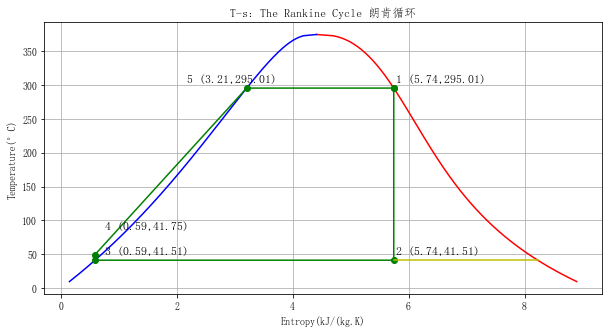

In [13]:
%matplotlib inline

from seuif97 import *
from matplotlib import rcParams  # figure Params
import matplotlib.pyplot as plt
import numpy as np

def PlotPrettyTSDiagram(Nodes):

    # set fonts, Windows only for Chinese: FangSong or simfang
    rcParams['font.family'] = 'sans-serif'
    rcParams['font.sans-serif'] = ['FangSong']  # Chinese-FangSong

    rcParams['axes.unicode_minus'] = False

    # plt.figure()
    plt.figure(figsize=(10.0, 5.0))  # figsize :set figure size

    # saturated vapor and liquid entropy lines
    npt = np.linspace(10, 647.096-273.15, 200)  # range of temperatures
    # saturated vapor tx2s(t, 1),x=1
    svap = [s for s in [tx2s(t, 1) for t in npt]]
    # saturated liquid tx2s(t, 0),x=0
    sliq = [s for s in [tx2s(t, 0) for t in npt]]
    plt.plot(svap, npt, 'r-')
    plt.plot(sliq, npt, 'b-')

    t = [Nodes[i]['t'] for i in range(4)]
    s = [Nodes[i]['s'] for i in range(4)]

    # Nodes[3]['t'] is slightly larger than Nodes[2]['t'] , 
    #   points Nodes[2] and Nodes[3] are almost overlap if drawing with real values
    # so,adjust the value of Nodes[3]['t'] ,
    #   using the virtual values to eliminate drawing overlap
    t[3] = Nodes[3]['t']+8

    # point 5 sat water
    t.append(px2t(Nodes[0]['p'], 0))
    s.append(px2s(Nodes[0]['p'], 0))
    
     # point 6  sat steam
    if (Nodes[0]['t']>px2t(Nodes[0]['p'],1)):
        t.append(px2t(Nodes[0]['p'], 1))
        s.append(px2s(Nodes[0]['p'], 1))

    t.append(Nodes[0]['t'])
    s.append(Nodes[0]['s'])

    plt.plot(s, t, 'go-')

    plt.annotate('1 ({:.2f},{:.2f})'.format(s[0], t[0]),
                 xy=(s[0], t[0]), xycoords='data',
                 xytext=(+2, +5), textcoords='offset points', fontsize=12)

    plt.annotate('2 ({:.2f},{:.2f})'.format(s[1], t[1]),
                 xy=(s[1], t[1]), xycoords='data',
                 xytext=(+2, +5), textcoords='offset points', fontsize=12)

    plt.annotate('3 ({:.2f},{:.2f})'.format(s[2], t[2]),
                 xy=(s[2], t[2]), xycoords='data',
                 xytext=(+10, +5), textcoords='offset points', fontsize=12)

    plt.annotate('4 ({:.2f},{:.2f})'.format(s[3], t[3]-8),
                 xy=(s[3], t[3]), xycoords='data',
                 xytext=(+10, +25), textcoords='offset points', fontsize=12)

    plt.annotate('5 ({:.2f},{:.2f})'.format(s[4], t[4]),
                 xy=(s[4], t[4]), xycoords='data',
                 xytext=(-60, +5), textcoords='offset points', fontsize=12)

    tist = [t[1], t[1]]
    sist = [s[1], px2s(Nodes[1]['p'], 1)]
    plt.plot(sist, tist, 'y-')

    #plt.title('T-s: Ideal Rankine Cycle')
    plt.title('T-s: The Rankine Cycle 朗肯循环')

    plt.xlabel('Entropy(kJ/(kg.K)')
    plt.ylabel('Temperature(°C)')
    plt.grid()  # Show Grid
    # The output of a matplotlib plot as an SVG
    # plt.savefig("./img/rankine81-TS.svg")
    plt.show()

PlotPrettyTSDiagram(Nodes) 

#### Matplotlib rcParams

The `matplotlibrc` file: same parameters are read at startup to configure matplotlib 

Dynamic rc settings

You can also dynamically change the default `rc` settings in a python script or interactively from the python shell. All of the `rc` settings are stored in a dictionary-like variable called `matplotlib.rcParams`, which is global to the matplotlib package. rcParams can be modified directly

##### The matplotlibrc file

```
%load c:\\python37\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc
```

In [14]:
import matplotlib
matplotlib.matplotlib_fname() #获取matplotlibrc文件名

'c:\\python38\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

#### Annotation

https://matplotlib.org/users/annotations.html
    
The uses of the basic `text()` will place text at an arbitrary position on the Axes. A common use case of text is to annotate some feature of the plot, and the `annotate()` method provides helper functionality to make annotations easy. 

In an annotation, there are two points to consider: the `location` being annotated represented by the argument `xy` and the `location` of the text `xytext`. Both of these arguments are `(x,y)` tuples.   

## 4  Analysis  with The  Data Files

### 4.1 Input Data files of Rankine Cycle

```python
import csv
```

#### 4.1.1   Input node data  file
```python
Nodes = [{'p': 8.0,  't': None, 'x': 1.0,   'h': None, 's': None},
         {'p': 0.008, 't': None, 'x': None, 'h': None, 's': None},
         {'p': 0.008, 't': None, 'x': 0.0,  'h': None, 's': None},
         {'p': 8.0,  't': None, 'x': 0.0,  'h': None, 's': None}
         ]
```

In [15]:
%%file ./rankine/simple-rankine81-nds.csv
NAME,NID,p,t,x
MainSteam,0,8,,1
OutletHP,1,0.008,,
CondenserWater,2,0.008,,0
MainFeedWater,3,8,,

Overwriting ./rankine/simple-rankine81-nds.csv


In [16]:
%%file ./rankine/simple-rankine82-nds.csv
NAME,NID,p,t,x
MainSteam,0,8,,1
OutletHP,1,0.008,,
CondenserWater,2,0.008,,0
MainFeedWater,3,8,,

Overwriting ./rankine/simple-rankine82-nds.csv


##### 4.1.1.1  Imporved the methods for Nodes data file

In [17]:
import csv

def read_nodesfile(filename):
    """ nodes in the  csv file"""
    
    # readlines() to the end of file
    countNodes = len(open(filename, 'r').readlines()) - 1
    nodes = [{} for i in range(countNodes)]

    #  re-open the file to its head 
    csvfile = open(filename, 'r')
    reader = csv.DictReader(csvfile)
    for line in reader:
        i = int(line['NID'])
        nodes[i]['NAME'] = line['NAME']
        try:
            nodes[i]['p'] = float(line['p'])
        except:
            nodes[i]['p'] = None
        try:
            nodes[i]['t'] = float(line['t'])
        except:
            nodes[i]['t'] = None
        try:
            nodes[i]['x'] = float(line['x'])
        except:
            nodes[i]['x'] = None

        if line['p'] != '' and line['t'] != '':
            nodes[i]['h'] = pt2h(nodes[i]['p'], nodes[i]['t'])
            nodes[i]['s'] = pt2s(nodes[i]['p'], nodes[i]['t'])
            nodes[i]['x'] = pt2x(nodes[i]['p'], nodes[i]['t'])
        elif line['p'] != '' and line['x'] != '':
            nodes[i]['t'] = px2t(nodes[i]['p'], nodes[i]['x'])
            nodes[i]['h'] = px2h(nodes[i]['p'], nodes[i]['x'])
            nodes[i]['s'] = px2s(nodes[i]['p'], nodes[i]['x'])
        elif line['t'] != '' and line['x'] != '':
            nodes[i]['p'] = tx2p(nodes[i]['t'], nodes[i]['x'])
            nodes[i]['h'] = tx2h(nodes[i]['t'], nodes[i]['x'])
            nodes[i]['s'] = tx2s(nodes[i]['t'], nodes[i]['x'])
    csvfile.close()
    return nodes

##### 4.1.1.2 Test Read Node Files

In [18]:
nds_filenames = ['./rankine/simple-rankine81-nds.csv','./rankine/simple-rankine82-nds.csv']

for filename in nds_filenames:
    Nodes = read_nodesfile(filename)
    print(Nodes)    

[{'NAME': 'MainSteam', 'p': 8.0, 't': 295.00912125631703, 'x': 1.0, 'h': 2758.611080680434, 's': 5.744848808940075}, {'NAME': 'OutletHP', 'p': 0.008, 't': None, 'x': None}, {'NAME': 'CondenserWater', 'p': 0.008, 't': 41.51005270424139, 'x': 0.0, 'h': 173.8517685972624, 's': 0.592531583591964}, {'NAME': 'MainFeedWater', 'p': 8.0, 't': None, 'x': None}]
[{'NAME': 'MainSteam', 'p': 8.0, 't': 295.00912125631703, 'x': 1.0, 'h': 2758.611080680434, 's': 5.744848808940075}, {'NAME': 'OutletHP', 'p': 0.008, 't': None, 'x': None}, {'NAME': 'CondenserWater', 'p': 0.008, 't': 41.51005270424139, 'x': 0.0, 'h': 173.8517685972624, 's': 0.592531583591964}, {'NAME': 'MainFeedWater', 'p': 8.0, 't': None, 'x': None}]


#### 4.1.2 The Devices  Text Data File

The dictionary of device based on the text data file of the device

```python
Turbine = {'minID': 0, 'moutID': 1, 'eta': 0.85, 'wdot': None}
Pump = {'minID': 2, 'moutID': 3, 'eta': 0.85, 'wdot': None}
Boiler = {'minID': 3, 'moutID': 0, 'qindot': None}
Condenser = {'minID': 1, 'moutID': 2, 'qoutdot': None}
```

In [19]:
%%file ./rankine/simple-rankine81-des.csv
NAME,TYPE,ETA,NODE0,NODE1
Turbine,TURBINE-EX0,1.0,0,1
Condenser,CONDENSER,,1,2
Feedwater Pump,PUMP,1.0,2,3
Boiler,BOILER,,3,0

Overwriting ./rankine/simple-rankine81-des.csv


In [20]:
%%file ./rankine/simple-rankine82-des.csv
NAME,TYPE,ETA,NODE0,NODE1
Turbine,TURBINE-EX0,0.85,0,1
Condenser,CONDENSER,,1,2
Feedwater Pump,PUMP,0.85,2,3
Boiler,BOILER,,3,0

Overwriting ./rankine/simple-rankine82-des.csv


##### 4.1.2.1 The method to read Devices Text Data File


In [21]:
import copy

compdict = {
    "BOILER": {'minID': None, 'moutID': None, 'qindot': None},
    "TURBINE-EX0": {'minID': None, 'moutID': None, 'eta': None, 'wdot': None},
    "PUMP": {'minID': None, 'moutID': None, 'eta': None, 'wdot': None},
    "CONDENSER": {'minID':None, 'moutID':None, 'qoutdot': None}
}

def read_DevicesFile(filename):
    """ nodes in the  csv file"""
    csvfile = open(filename, 'r')
    reader = csv.DictReader(csvfile)
    
    for curdev in reader:
        temp=copy.deepcopy(compdict)
        curdict = temp[curdev['TYPE']]
        curdict['minID'] = int(curdev['NODE0'])
        curdict['moutID'] = int(curdev['NODE1'])
        try:
            curdict['eta'] = float(curdev['ETA'])
        except:
            pass
        
        if curdev['TYPE'] == "BOILER":
            Boiler=curdict
        if curdev['TYPE'] == "TURBINE-EX0":
            Turbine=curdict
        if curdev['TYPE'] == "PUMP":
            Pump=curdict
        if curdev['TYPE'] == "CONDENSER":
            Condenser=curdict    
    
    csvfile.close()
    return Boiler, Turbine, Pump,Condenser

######  copy.deepcopy()

**dict is mutable**

A `deep copy` constructs a new **compound** object and then, recursively, inserts copies into it of the objects found in the original.

```python
temp=copy.deepcopy(compdict)
```
The next codes change the `temp`  of `compdict`'s deepcopy without changing the `compdict`.

```python
  temp=copy.deepcopy(compdict)
  curdict = temp[curdev['TYPE']]
  curdict['minID'] = int(curdev['NODE0'])
```


##### 4.1.2.2 Test Device Data File

In [22]:
import csv
import pprint

nds_filenames = ['./rankine/simple-rankine81-nds.csv','./rankine/simple-rankine82-nds.csv']
des_filenames = ['./rankine/simple-rankine81-des.csv','./rankine/simple-rankine82-des.csv']

# 1 nodes
for i in range(len(nds_filenames)):
    Nodes = read_nodesfile(nds_filenames[i])

    Boiler,Turbine, Pump,Condenser=read_DevicesFile(des_filenames[i])
    CalDevices(Boiler,Turbine, Pump, Condenser, Nodes)

    pp = pprint.PrettyPrinter(indent=4)
    pp.pprint(Boiler)
    pp.pprint(Turbine)
    pp.pprint(Pump)
    pp.pprint(Condenser)

{'minID': 3, 'moutID': 0, 'qindot': 2576.7132944132704}
{'eta': 1.0, 'minID': 0, 'moutID': 1, 'wdot': 963.5340439432525}
{'eta': 1.0, 'minID': 2, 'moutID': 3, 'wdot': 8.046017669901119}
{'minID': 1, 'moutID': 2, 'qoutdot': 1621.225268139919}
{'minID': 3, 'moutID': 0, 'qindot': 2575.2934089421115}
{'eta': 0.85, 'minID': 0, 'moutID': 1, 'wdot': 819.0039373517648}
{'eta': 0.85, 'minID': 2, 'moutID': 3, 'wdot': 9.465903141060153}
{'minID': 1, 'moutID': 2, 'qoutdot': 1765.7553747314068}


### 4.2 Output Data File: Performance Data

In [23]:
def OutFiles(Nodes,Cycle, outfilename=None):
        savedStdout = sys.stdout
        if (outfilename != None):
            datafile = open(outfilename, 'w', encoding='utf-8')
            sys.stdout = datafile
        
        # output Cycle 
        print('\nThe thermal efficiency for the cycle is {:>.2f}%'.format(Cycle['eta']*100))
        print('Heat Rate is {:>.2f}kJ/kWh.'.format(Cycle['HeatRate']))
        print('Steam Rate is {:>.2f}kg/kWh'.format(Cycle['SteamRate']))

        # output nodes
        print('{:10}\t {:^6}\t {:^7}  {:^7}  {:^7}  {:^7}'.format(
            "NAME", "Node", "P(MPa)", "T(°C)", "H(kJ/kg)", "S(kJ/kg.K)"))
        i = 0
        for node in Nodes:
            print('{:10}\t {:^6d}\t {:>5.3f} {:>9.2f} {:>10.2f} {:>9.3f}'.format(
                node['NAME'], i, node['p'],  node['t'],  node['h'],  node['s']))
            i += 1
        
       
        if (outfilename != None):
            datafile.close()
            sys.stdout = savedStdout

#####  Redirect `stdout` to a file

29.1. sys — System-specific parameters and functions

https://docs.python.org/3/library/sys.html

This module provides access to some variables used or maintained by the **interpreter** and to functions that interact strongly with the interpreter. It is always available.

File objects used by the interpreter for **standard input, output and errors**:

* sys.stdin ： is used for all interactive input (including calls to input());

* `sys.stdout` ：is used for the output of `print()` and expression statements and for the prompts of input();

* sys.stderr：The interpreter’s own prompts and its error messages go to stderr.

These `streams` are regular **text** files like those returned by the `open()` function. 

```python
import sys
sys.stdout = open('Redirect2file.txt', 'w')
print('redirect sys.stdout to file')
```

In [24]:
# redirect sys.stdout to file.txt
import sys
savedStdout=sys.stdout

# 1 start redirection to file
sys.stdout = open('./rankine/Redirect2file.txt', 'w', encoding='utf-8')
print('redirect sys.stdout to file')

# 2 end redirection 
sys.stdout =savedStdout

In [25]:
# sys.stdout
print('sys.stdout')

sys.stdout


In [26]:
# %load ./rankine/Redirect2file.txt

### 4.3 Analysis Performance

#### glob — Unix style pathname pattern expansion
https://docs.python.org/3/library/glob.html

The glob module finds all the pathnames matching a specified pattern according to the rules used by the Unix shell, although results are returned in arbitrary order. No tilde(~) expansion is done, but 

* `*, ?`, and character ranges expressed with `[]` will be correctly matched

```python
import glob

nds_filesname_str='./rankine/rankine8[0-9]-nds.csv'
nds_filesnames=glob.glob(nds_filesname_str)

des_filesname_str='./rankine/rankine8[0-9].des.csv'
nds_filesnames=glob.glob(des_filesname_str)
```

In [31]:
import glob
#nds_filenames = ['./rankine/simple-rankine81-nds.csv','./rankine/simple-rankine82-nds.csv']
#des_filenames = ['./rankine/simple-rankine81-des.csv','./rankine/simple-rankine82-des.csv']

nds_filesname_str='./rankine/rankine8[0-9]-nds.csv'
nds_filesnames=glob.glob(nds_filesname_str)

des_filesname_str='./rankine/rankine8[0-9].des.csv'
nds_filesnames=glob.glob(des_filesname_str)

def AnalysisCycle(nds_filename,des_filename):
    # 1 nodes
    Nodes = read_nodesfile(nds_filename)
    # 2 devices
    Boiler,Turbine, Pump,Condenser=read_DevicesFile(des_filename)
    CalDevices(Boiler,Turbine, Pump,Condenser,  Nodes)
    # 3 cycle
    Cycle = {'Wdot': 100.0}
    CalCycle(Boiler,Turbine, Pump,Condenser,   Cycle)
    # 4 output
    cyclename = nds_filename[0:nds_filename.find('-nds')]
    OutFiles(Nodes, Cycle)
    OutFiles(Nodes, Cycle,cyclename +'-sp.txt')
    return Nodes

AllNodes=[]
for i in range(len(nds_filenames)):
    nodes=AnalysisCycle(nds_filenames[i],des_filenames[i])
    AllNodes.append(nodes)



The thermal efficiency for the cycle is 37.08%
Heat Rate is 9708.30kJ/kWh.
Steam Rate is 3.77kg/kWh
NAME      	  Node 	 P(MPa)    T(°C)   H(kJ/kg)  S(kJ/kg.K)
MainSteam 	   0   	 8.000    295.01    2758.61     5.745
OutletHP  	   1   	 0.008     41.51    1795.08     5.745
CondenserWater	   2   	 0.008     41.51     173.85     0.593
MainFeedWater	   3   	 8.000     41.75     181.90     0.593

The thermal efficiency for the cycle is 31.43%
Heat Rate is 11452.28kJ/kWh.
Steam Rate is 4.45kg/kWh
NAME      	  Node 	 P(MPa)    T(°C)   H(kJ/kg)  S(kJ/kg.K)
MainSteam 	   0   	 8.000    295.01    2758.61     5.745
OutletHP  	   1   	 0.008     41.51    1939.61     6.204
CondenserWater	   2   	 0.008     41.51     173.85     0.593
MainFeedWater	   3   	 8.000     42.09     183.32     0.597


In [ ]:
!dir .\rankine\*-sp.txt

### 4.4 Plot T-s Diagram:The Pretty T-S Diagram with Chinese and annotate


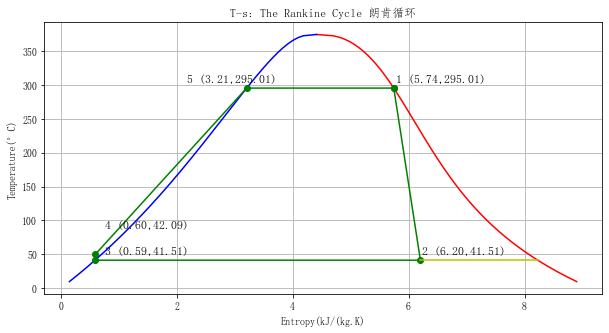

In [30]:
%matplotlib inline

from seuif97 import *
from matplotlib import rcParams  # figure Params
import matplotlib.pyplot as plt
import numpy as np


def PlotPrettyTSDiagram(Nodes):

    # set fonts, Windows only for Chinese: FangSong or simfang
    rcParams['font.family'] = 'sans-serif'
    rcParams['font.sans-serif'] = ['FangSong']  # Chinese-FangSong

    rcParams['axes.unicode_minus'] = False

    # plt.figure()
    plt.figure(figsize=(10.0, 5.0))  # figsize :set figure size

    # saturated vapor and liquid entropy lines
    npt = np.linspace(10, 647.096-273.15, 200)  # range of temperatures
    # saturated vapor tx2s(t, 1),x=1
    svap = [s for s in [tx2s(t, 1) for t in npt]]
    # saturated liquid tx2s(t, 0),x=0
    sliq = [s for s in [tx2s(t, 0) for t in npt]]
    plt.plot(svap, npt, 'r-')
    plt.plot(sliq, npt, 'b-')

    t = [Nodes[i]['t'] for i in range(4)]
    s = [Nodes[i]['s'] for i in range(4)]

    # Nodes[3]['t'] is slightly larger than Nodes[2]['t'] , 
    #   points Nodes[2] and Nodes[3] are almost overlap if drawing with real values
    # so,adjust the value of Nodes[3]['t'] ,
    #   using the virtual values to eliminate drawing overlap
    t[3] = Nodes[3]['t']+8

    # point 5 sat water
    t.append(px2t(Nodes[0]['p'], 0))
    s.append(px2s(Nodes[0]['p'], 0))
    
     # point 6  sat steam
    if (Nodes[0]['t']>px2t(Nodes[0]['p'],1)):
        t.append(px2t(Nodes[0]['p'], 1))
        s.append(px2s(Nodes[0]['p'], 1))

    t.append(Nodes[0]['t'])
    s.append(Nodes[0]['s'])

    plt.plot(s, t, 'go-')

    plt.annotate('1 ({:.2f},{:.2f})'.format(s[0], t[0]),
                 xy=(s[0], t[0]), xycoords='data',
                 xytext=(+2, +5), textcoords='offset points', fontsize=12)

    plt.annotate('2 ({:.2f},{:.2f})'.format(s[1], t[1]),
                 xy=(s[1], t[1]), xycoords='data',
                 xytext=(+2, +5), textcoords='offset points', fontsize=12)

    plt.annotate('3 ({:.2f},{:.2f})'.format(s[2], t[2]),
                 xy=(s[2], t[2]), xycoords='data',
                 xytext=(+10, +5), textcoords='offset points', fontsize=12)

    plt.annotate('4 ({:.2f},{:.2f})'.format(s[3], t[3]-8),
                 xy=(s[3], t[3]), xycoords='data',
                 xytext=(+10, +25), textcoords='offset points', fontsize=12)

    plt.annotate('5 ({:.2f},{:.2f})'.format(s[4], t[4]),
                 xy=(s[4], t[4]), xycoords='data',
                 xytext=(-60, +5), textcoords='offset points', fontsize=12)

    tist = [t[1], t[1]]
    sist = [s[1], px2s(Nodes[1]['p'], 1)]
    plt.plot(sist, tist, 'y-')

    #plt.title('T-s: Ideal Rankine Cycle')
    plt.title('T-s: The Rankine Cycle 朗肯循环')

    plt.xlabel('Entropy(kJ/(kg.K)')
    plt.ylabel('Temperature(°C)')
    plt.grid()  # Show Grid
    # The output of a matplotlib plot as an SVG
    # plt.savefig("./img/rankine81-TS.svg")
    plt.show()

PlotPrettyTSDiagram(AllNodes[1]) 